In [138]:
from astropy import units as u
import numpy as np
from glob import glob
import os
from pyuvdata import UVData
from astropy.coordinates import Angle
from astropy.io import fits
from tqdm.notebook import tqdm
#from casatasks import importuvfits, exportfits, tclean, importfits
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
#%matplotlib notebook
from astropy.wcs import WCS
import warnings
warnings.filterwarnings("ignore")
import matplotlib.image as mpimg

In [169]:
imagepath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/'
imagefiles=np.sort(glob(os.path.join(imagepath, 'lst.*.uvcRP.phased.image/lst.*.image.fits')))
nfiles = len(imagefiles)

In [180]:
# What the fuck is going on with the image brightnesses?
bright = {'ra': np.zeros(nfiles),
          'I': np.zeros(nfiles),
          'Q': np.zeros(nfiles),
          'U': np.zeros(nfiles),
          'V': np.zeros(nfiles)}
for ii, imagefile in tqdm(enumerate(imagefiles)):
    hdu = fits.open(imagefile)
    header = hdu[0].header
    image_wcs = WCS(header, naxis=[1,2])
    image = hdu[0].data
    
    bright['ra'][ii] = header['OBSRA']/15.
    
    bright['I'][ii] = image[0,0,:,:].max()
    bright['Q'][ii] = image[1,0,:,:].max()
    bright['U'][ii] = image[2,0,:,:].max()
    bright['V'][ii] = image[3,0,:,:].max()
    

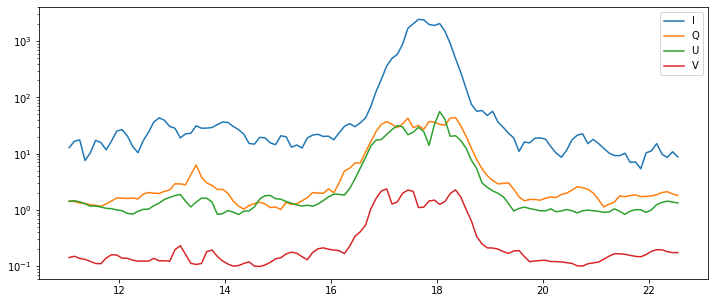

In [182]:
plt.figure(figsize=(12,5))
stokes = list(bright.keys())
stokes.remove('ra')
for s in stokes:
    plt.semilogy(bright['ra'], bright[s], label=s)
plt.legend()

In [ ]:
plt.figure(figsize=(12,5))
pols = list(bright.keys())
pols.remove('ra')
pols.remove('I')
for p in pols:
    plt.semilogy(bright['ra'], bright[p]/bright['I'], label=p, marker='o', linestyle='--')
plt.legend()

In [186]:
# Set up before the loop
props = dict(boxstyle='round', facecolor='white')#, alpha=0.5)
stokes_label = ['I', 'Q', 'U', 'V']

In [188]:
filehandle?

Object `filehandle` not found.


In [192]:
# Annoying that this is always so cumbersome
def filehandle(fullpath):
    path, filename = os.path.split(fullpath)
    basename, ext = os.path.splitext(filename)
    ext = ext[1:]
    return path, basename, ext

In [191]:
os.path.splitext(os.path.split(imagefile)[1])

('lst.2457756.22h30m00s.22h35m50s.uvcRP.phased.image', '.fits')

In [194]:
for ii, imagefile in tqdm(enumerate(imagefiles)):
    
    path, basename, ext = filehandle(imagefile)
    pngfile = os.path.join(path,basename+'.png')
    
    hdu = fits.open(imagefile)
    header = hdu[0].header
    image_wcs = WCS(header, naxis=[1,2])
    image = hdu[0].data

    lst_label = os.path.split(imagefile)[1].split('.')[2]
    
    fig, ax = plt.subplots(nrows=2, ncols=2, 
                           sharex = 'all', sharey = 'all', 
                           figsize=(11.5,9), 
                           subplot_kw = {'projection' : image_wcs} )

    fig.suptitle(lst_label)
    for ii in np.arange(4):
        xx,yy = int(ii/2),ii%2

        imax = image[0,0,:,:].max()
        if stokes_label[ii] == 'I':    
            vmin = -0.2*imax
            vmax = 0.95*imax
        if stokes_label[ii] == 'Q':
            vmax = 0.1 * imax
            vmin = -0.1 * imax
        if stokes_label[ii] == 'U':
            vmax = 0.1 * imax
            vmin = -0.1 * imax
        if stokes_label[ii] == 'V':
            vmax = 0.01 * imax
            vmin = -0.01 * imax

        im = ax[xx,yy].imshow(image[ii,0,:,:], origin='lower', vmin=vmin, vmax=vmax)
                              #, norm=SymLogNorm(ssat), vmin=-ssat*5, vmax=ssat*5)
        ax[xx,yy].plot(x0, y0,'+', color='white')
        ax[xx,yy].text(0.05, 0.95, stokes_label[ii], transform=ax[xx,yy].transAxes, fontsize=14,
                       verticalalignment='top', bbox=props)

        plt.colorbar(im, ax=ax[xx,yy], shrink=0.7)
        ax[xx,yy].grid(color='white',alpha=0.75)

        # There's unquestionably a better way to get matplotlib to share axes
        if (ii == 2 or ii == 3):
            ax[xx,yy].set_xlabel('RA (J2000)', fontsize=12)
        else:
            ax[xx,yy].set_xlabel(' ')
        if (ii == 0 or ii == 2):
            ax[xx,yy].set_ylabel('Dec (J2000)', fontsize=12)
        else:
            ax[xx,yy].set_ylabel(' ')

    fig.tight_layout(h_pad=2, pad=8, w_pad=3)
    print('Saving '+pngfile)
    fig.savefig(pngfile)
    plt.close()

Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.11h00m00s.11h05m50s.uvcRP.phased.image/lst.2457756.11h00m00s.11h05m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.11h06m00s.11h11m50s.uvcRP.phased.image/lst.2457756.11h06m00s.11h11m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.11h12m00s.11h17m50s.uvcRP.phased.image/lst.2457756.11h12m00s.11h17m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.11h18m00s.11h23m50s.uvcRP.phased.image/lst.2457756.11h18m00s.11h23m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.11h24m00s.11h29m50s.uvcRP.phased.image/lst.2457756.11h24m00s.11h29m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulat

Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.15h30m00s.15h35m50s.uvcRP.phased.image/lst.2457756.15h30m00s.15h35m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.15h36m00s.15h41m50s.uvcRP.phased.image/lst.2457756.15h36m00s.15h41m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.15h42m00s.15h47m50s.uvcRP.phased.image/lst.2457756.15h42m00s.15h47m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.15h48m00s.15h53m50s.uvcRP.phased.image/lst.2457756.15h48m00s.15h53m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.15h54m00s.15h59m50s.uvcRP.phased.image/lst.2457756.15h54m00s.15h59m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulat

Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.20h00m00s.20h05m50s.uvcRP.phased.image/lst.2457756.20h00m00s.20h05m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.20h06m00s.20h11m50s.uvcRP.phased.image/lst.2457756.20h06m00s.20h11m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.20h12m00s.20h17m50s.uvcRP.phased.image/lst.2457756.20h12m00s.20h17m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.20h18m00s.20h23m50s.uvcRP.phased.image/lst.2457756.20h18m00s.20h23m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulation/lst.2457756.20h24m00s.20h29m50s.uvcRP.phased.image/lst.2457756.20h24m00s.20h29m50s.uvcRP.phased.image.png
Saving /lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/LSTSlice/Simulat

In [195]:
pngfiles=np.sort(glob(os.path.join(imagepath, 'lst.*.uvcRP.phased.image/lst.*.image.png')))

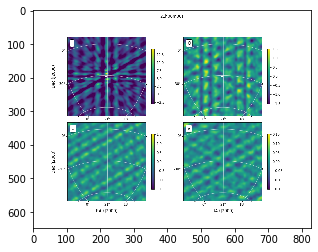

In [201]:
img=mpimg.imread(pngfiles[100])
plt.imshow(img)